# 基于神经网络的手写数字识别(多分类)

* 选用kernel learning_dl
~~~
conda activate learning_dl 

# conda remove --name learning_dl --all
# kill -9 +id
~~~

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests2 import * 

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

print("finish import module!!!")

finish import module!!!


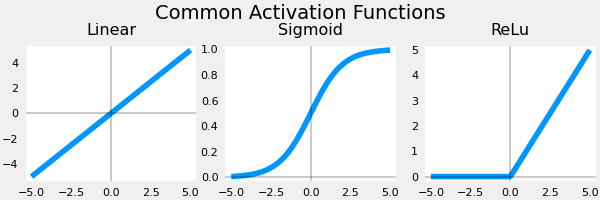

In [6]:
# 将三种激活函数画出来
plt_act_trio()

# 基于numpy的实现Softmax

In [2]:
# UNQ_C1
# GRADED CELL: my_softmax
def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """    
    ### START CODE HERE ### 
    ez = np.exp(z)              
    a = ez/np.sum(ez)            
    return(a)
    ### END CODE HERE ### 
    # return a

z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

# BEGIN UNIT TEST  
test_my_softmax(my_softmax)
# END UNIT TEST  

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]
 All tests passed.


# 基于Tensorflow的实现

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


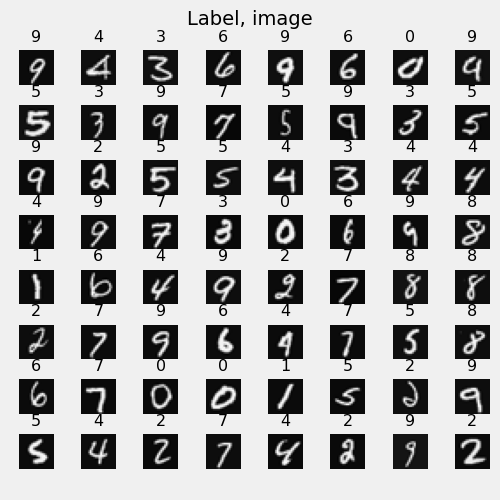

In [2]:
# load dataset
X, y = load_data_multiclass()

# print ('The first element of X is: ', X[0])
# print ('The first element of y is: ', y[0,0])
# print ('The last element of y is: ', y[-1,0])

print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

#将数据画出来
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

# 可以看到跟二分类不同，这里的数据集是多分类的，有0~9共10个类别

In [3]:
#定义模型
# UNQ_C2
# GRADED CELL: Sequential model
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(400,)),     # @REPLACE 
        Dense(25, activation='relu', name = "L1"), # @REPLACE 
        Dense(15, activation='relu',  name = "L2"), # @REPLACE  
        Dense(10, activation='linear', name = "L3"),  # @REPLACE 
        ### END CODE HERE ### 
    ], name = "my_model" 
)

model.summary()
test_model(model, 10, 400)

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 25)                10025     
_________________________________________________________________
L2 (Dense)                   (None, 15)                390       
_________________________________________________________________
L3 (Dense)                   (None, 10)                160       
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________
All tests passed!


In [4]:
#确定网络的结果是否有误
[layer1, layer2, layer3] = model.layers
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [4]:
#定义损失函数及进行训练
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 [==============================] - 2s 5ms/step - loss: 1.7094
Epoch 2/40
157/157 [==============================] - 0s 3ms/step - loss: 0.7480
Epoch 3/40
157/157 [==============================] - 1s 4ms/step - loss: 0.4428
Epoch 4/40
157/157 [==============================] - 1s 6ms/step - loss: 0.3463
Epoch 5/40
157/157 [==============================] - 1s 6ms/step - loss: 0.2977
Epoch 6/40
157/157 [==============================] - 0s 3ms/step - loss: 0.2630
Epoch 7/40
157/157 [==============================] - 1s 3ms/step - loss: 0.2361
Epoch 8/40
157/157 [==============================] - 1s 6ms/step - loss: 0.2131
Epoch 9/40
157/157 [==============================] - 0s 3ms/step - loss: 0.2004
Epoch 10/40
157/157 [==============================] - 0s 3ms/step - loss: 0.1805
Epoch 11/40
157/157 [==============================] - 1s 5ms/step - loss: 0.1692
Epoch 12/40
157/157 [==============================] - 0s 3ms/step - loss: 0.1580
Epoch 13/40
157/157 [====

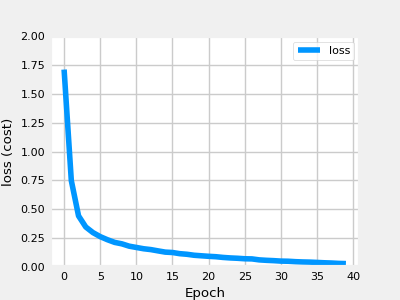

In [5]:
# 将loss画出来
plot_loss_tf(history)

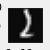

 predicting a Two: 
[[ -7.99  -2.23   0.77  -2.41 -11.66 -11.15  -9.53  -3.36  -4.42  -7.17]]
 Largest Prediction index: 2


In [6]:
#进行预测
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

In [13]:
prediction_p = tf.nn.softmax(prediction)
# 十个类别的概率，最大的概率对应的类别就是预测的类别
print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f" Largest Prediction index: {np.max(prediction_p)}")
print(f" Largest Prediction index: {np.argmax(prediction_p)}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[1.42e-04 4.49e-02 8.98e-01 3.76e-02 3.61e-06 5.97e-06 3.03e-05 1.44e-02
  5.03e-03 3.22e-04]]
 Largest Prediction index: 0.8975780010223389
 Largest Prediction index: 2
Total of predictions: 1.000


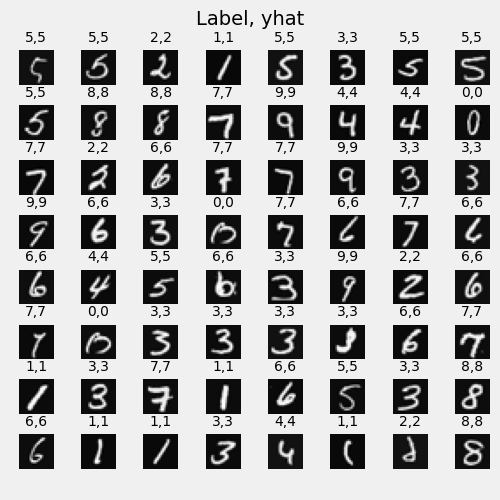

In [14]:
#随机选择64个数据进行预测
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

15 errors out of 5000 images


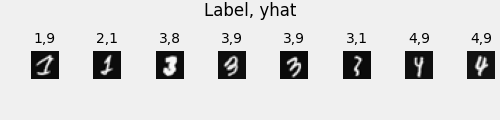

In [15]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")